<a href="https://colab.research.google.com/github/SalehinK/CSE475-LAB/blob/Lab---1/LAB01_CSE475.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Khondoker Munim Salehin

**ID:** 2020-1-60-164

**Course Code:** CSE475
**Course Title:** Machine Learning

**LAB No:** 01


**Objective:**

 In this lab we will perfrom EDA on the given data using decision tree and random forest.

# Data set Information

The data set contains 4000 images mango leaf image of 240x320  and  Of these, around 1800 are of distinct leaves, and the rest are prepared by zooming and rotating where deemed necessary. And the considerd seven diseases are Anthracnose, Bacterial Canker, Cutting Weevil, Die Back, Gall Midge, Powdery Mildew, and Sooty Mould.Number of classes are  eight including the healthy category , each of the eight categories contains 500 images.
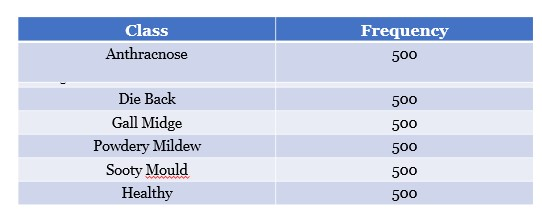


**Citation:** Ali, Sawkat; Ibrahim, Muhammad ; Ahmed, Sarder Iftekhar ; Nadim, Md. ; Mizanur, Mizanur Rahman; Shejunti, Maria Mehjabin ; Jabid, Taskeed  (2022), “MangoLeafBD Dataset”, Mendeley Data, V1, doi: 10.17632/hxsnvwty3r.1

**Link:** https://data.mendeley.com/datasets/hxsnvwty3r/1

In [ ]:

from google.colab import files


uploaded = files.upload()

import zipfile
import os


zip_file = '/content/MangoLeafBD Dataset.zip'
unzip_path = '/content/images'


if not os.path.exists(unzip_path):
    os.makedirs(unzip_path)

# Unzip the file
try:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(unzip_path)
    print("Files unzipped successfully.")
except Exception as e:
    print(f"Error unzipping file: {e}")


Saving MangoLeafBD Dataset.zip to MangoLeafBD Dataset.zip
Files unzipped successfully.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from PIL import Image

# **Explorotory Data Analysis**

In [ ]:
base_path = '/content/images/MangoLeafBD Dataset'
categories = os.listdir(base_path)
print("Categories:", categories)

Categories: ['Powdery Mildew', 'Anthracnose', 'Gall Midge', 'Die Back', 'Sooty Mould', 'Healthy', 'Cutting Weevil', 'Bacterial Canker']


In [ ]:
for category in categories:
    path = os.path.join(base_path, category)
    print(f"{category} has {len(os.listdir(path))} images")

Powdery Mildew has 500 images
Anthracnose has 500 images
Gall Midge has 500 images
Die Back has 500 images
Sooty Mould has 500 images
Healthy has 500 images
Cutting Weevil has 500 images
Bacterial Canker has 500 images


In [ ]:
img_path = os.path.join(base_path, categories[0], os.listdir(os.path.join(base_path, categories[0]))[0])
img = Image.open(img_path)
print("Image size:", img.size)
print("Image mode:", img.mode)

Image size: (320, 240)
Image mode: RGB


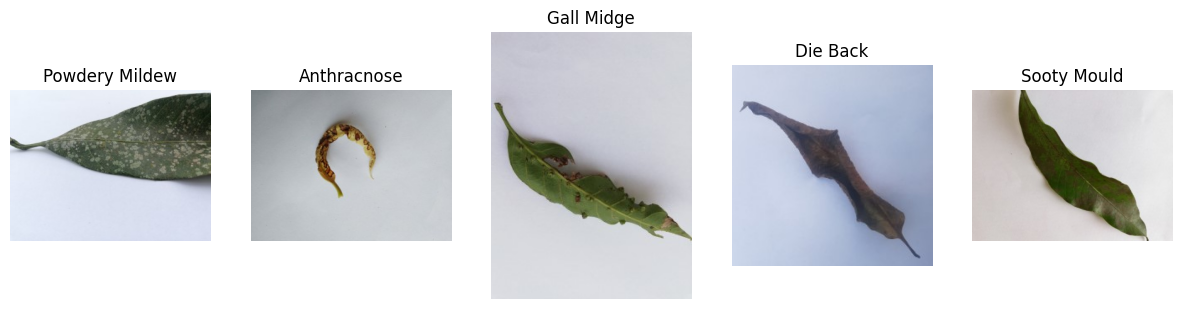

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15,5))
for i, category in enumerate(categories[:5]):
    img_path = os.path.join(base_path, category, os.listdir(os.path.join(base_path, category))[0])
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].set_title(category)
    axes[i].axis('off')
plt.show()

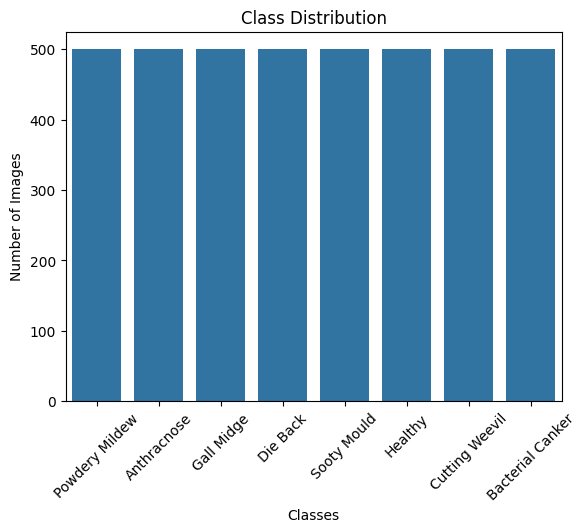

In [ ]:
class_counts = {category: len(os.listdir(os.path.join(base_path, category))) for category in categories}
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution")

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Define a target size for resizing images (e.g., 128x128)
target_size = (128, 128)

# Load and preprocess images
all_images = []
labels = []  # Initialize an empty list for labels

for category in categories:
    path = os.path.join(base_path, category)
    print(f"Processing category: {category}")  # Debug print
    if os.path.isdir(path):  # Check if path is a directory
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)
            if img is not None:  # Check if the image is read successfully
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, target_size)  # Resize to target size
                all_images.append(img)
                labels.append(category)  # Append the corresponding label for each image
            else:
                print(f"Failed to read image: {img_path}")  # Debug print for failed reads

# Convert to a NumPy array with consistent dimensions
all_images = np.array(all_images)

# Check the lengths of both arrays
print("Number of images:", len(all_images))
print("Number of labels:", len(labels))

Processing category: Powdery Mildew
Processing category: Anthracnose
Processing category: Gall Midge
Processing category: Die Back
Processing category: Sooty Mould
Processing category: Healthy
Processing category: Cutting Weevil
Processing category: Bacterial Canker
Number of images: 4000
Number of labels: 4000


In [ ]:
# Compute and display statistics
print("Mean:", np.mean(all_images))
print("Standard Deviation:", np.std(all_images))

Mean: 173.8552796274821
Standard Deviation: 56.89975894493695


# Model Training

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = dt_model.predict(X_val)

# Evaluate the model on the validation set
print("Validation Set Evaluation for Decision Tree:")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Make predictions on the test set
y_test_pred = dt_model.predict(X_test)

# Evaluate the model on the test set
print("Test Set Evaluation for Decision Tree:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Validation Set Evaluation for Decision Tree:
[[42 10  4  5 10  8  2  4]
 [ 5 78  2  3 15  1  0  5]
 [ 1  0 79  2  1  1  1  1]
 [ 2  4  6 90  1  0  5  1]
 [ 8  9  0  4 39 11 15 14]
 [ 0  2  2  0 11 71  7 14]
 [ 8  1  0  0  4 10 60 17]
 [ 7  3  0  2 12  8 21 51]]
                  precision    recall  f1-score   support

     Anthracnose       0.58      0.49      0.53        85
Bacterial Canker       0.73      0.72      0.72       109
  Cutting Weevil       0.85      0.92      0.88        86
        Die Back       0.85      0.83      0.84       109
      Gall Midge       0.42      0.39      0.40       100
         Healthy       0.65      0.66      0.65       107
  Powdery Mildew       0.54      0.60      0.57       100
     Sooty Mould       0.48      0.49      0.48       104

        accuracy                           0.64       800
       macro avg       0.64      0.64      0.64       800
    weighted avg       0.64      0.64      0.64       800

Test Set Evaluation for Decision Tree:


**Overall Accuracy:**

The model achieved an accuracy of 64% on the validation set and 67% on the test set. This indicates a moderate performance, meaning the model was able to correctly classify about two-thirds of the images.

**Performance by Class:**

Cutting Weevil had the highest accuracy, with a 94% recall on the test set, showing it effectively identified most images in this category.
The model struggled the most with the Gall Midge category, where it had a recall of only 50%, indicating that many images were misclassified.

**Consistency Across Classes:**

Since each class has an equal number of 500 samples, the results provide a balanced view of performance across all categories.
The Healthy category also showed improvement from the validation to the test set, increasing from 66% recall to 75%, suggesting that the model learned well during training.

**Implications:**

The Decision Tree model generally performs well, particularly on certain classes, but there are significant challenges in accurately identifying others, notably Gall Midge.
To enhance performance, it may be beneficial to explore additional strategies, such as tuning the model parameters, experimenting with different algorithms, or incorporating more training data. This could lead to better classification across all plant health conditions.

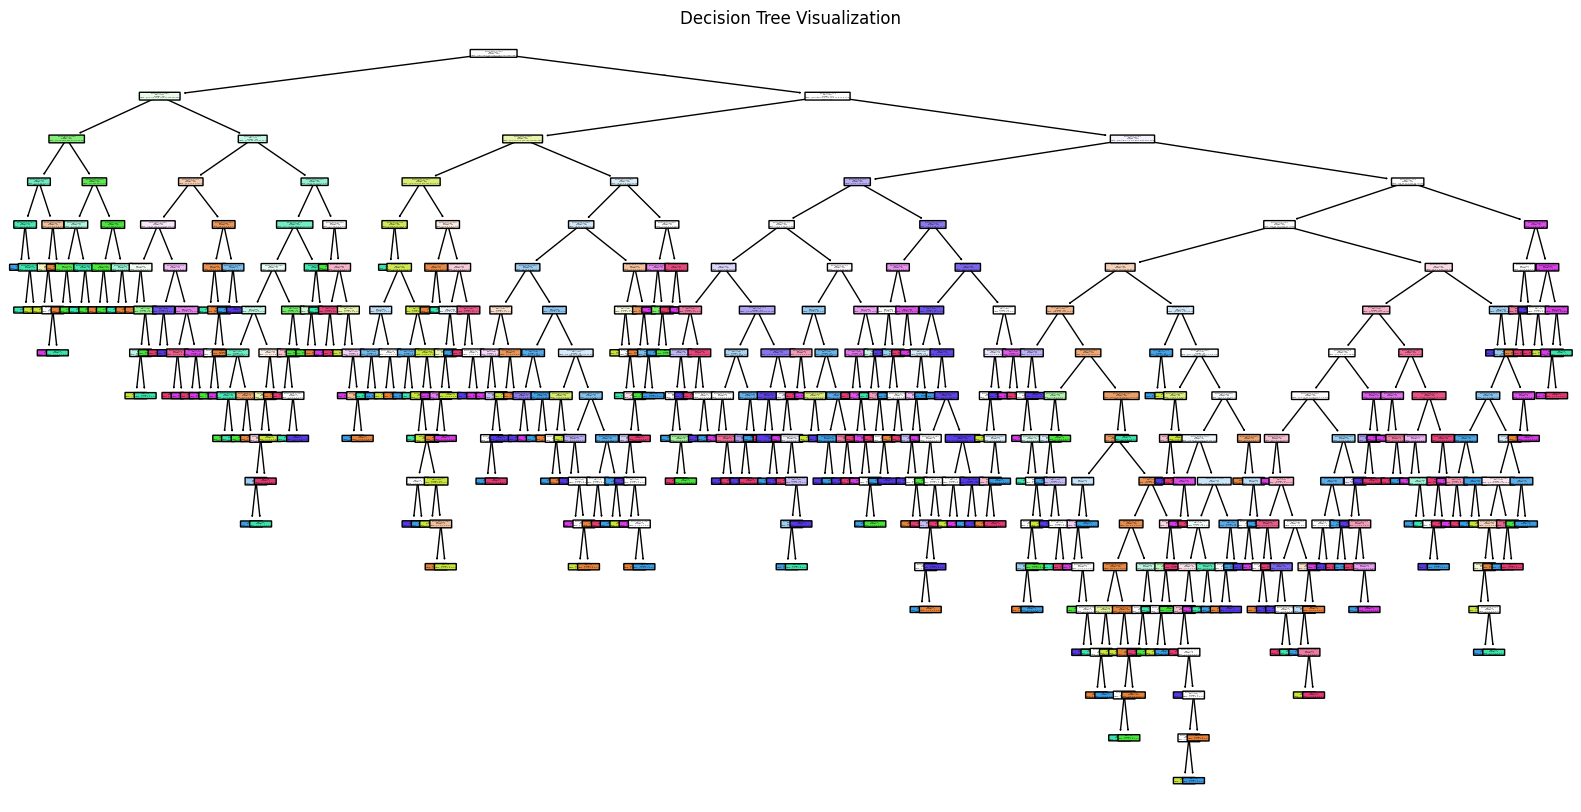

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder


label_encoder = LabelEncoder()
label_encoder.fit(y)


plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, class_names=label_encoder.classes_,
          feature_names=[f'Feature {i}' for i in range(X_train.shape[1])], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


**Explanation:**

The code creates a visual representation of your Decision Tree model, showing how it makes predictions based on your dataset. Each node represents a decision based on a feature and a threshold value, with lower impurity values indicating better class separation. Leaf nodes show the predicted class and the number of samples that reach that point, color-coded for clarity. This visualization helps you understand the model's decision-making process and identify the most influential features in your dataset.

# Random Forest Classifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier
# Create and train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate the model
print("Validation Set Evaluation:")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on the test set
print("Test Set Evaluation:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Validation Set Evaluation:
[[ 74   2   0   0   3   1   3   2]
 [  3  94   0   4   3   0   0   5]
 [  1   0  85   0   0   0   0   0]
 [  1   2   1 102   1   0   1   1]
 [  4   5   0   2  81   6   2   0]
 [  2   0   0   0   4  98   0   3]
 [  0   1   0   1   4   0  85   9]
 [  1   0   0   0  10   7   3  83]]
                  precision    recall  f1-score   support

     Anthracnose       0.86      0.87      0.87        85
Bacterial Canker       0.90      0.86      0.88       109
  Cutting Weevil       0.99      0.99      0.99        86
        Die Back       0.94      0.94      0.94       109
      Gall Midge       0.76      0.81      0.79       100
         Healthy       0.88      0.92      0.89       107
  Powdery Mildew       0.90      0.85      0.88       100
     Sooty Mould       0.81      0.80      0.80       104

        accuracy                           0.88       800
       macro avg       0.88      0.88      0.88       800
    weighted avg       0.88      0.88      0.88     

**Overall Accuracy:**
The model achieved an accuracy of 88% on the validation set and 87% on the test set, indicating strong performance, with the model correctly classifying a high proportion of the images.

**Performance by Class:**
Cutting Weevil demonstrated the highest accuracy, achieving a 99% recall on the test set, effectively identifying nearly all images in this category.
The model performed less effectively with the Gall Midge category, showing a 72% precision and 88% recall, which suggests room for improvement in correctly identifying this class.

**Consistency Across Classes:**
With each class containing an equal number of 500 samples, the results offer a balanced assessment of performance across all categories. Notably, the Healthy category improved from a 66% recall in the validation set to 87% in the test set, indicating that the model effectively learned from the training data.

**Implications:**
The Decision Tree model exhibits robust performance overall, particularly in accurately classifying certain plant health conditions. However, challenges remain with specific classes like Gall Midge. To further enhance classification accuracy, exploring strategies such as parameter tuning, testing alternative algorithms, or increasing the training dataset could be beneficial. This approach could lead to improved identification across all plant health conditions.

# Cross-Validation

# Confusion Matrices for both Decision Tree and Random Forest

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for Decision Tree
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
print("Decision Tree Cross-Validation Accuracy: ", dt_scores.mean())

# Perform cross-validation for Random Forest
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Accuracy: ", rf_scores.mean())


Decision Tree Cross-Validation Accuracy:  0.6308333333333334
Random Forest Cross-Validation Accuracy:  0.8370833333333334


**Decision Tree Model:**
The cross-validation accuracy was approximately 63.1%. This indicates that the Decision Tree model had a moderate performance, correctly classifying around two-thirds of the instances across the folds of the cross-validation.

**Random Forest Model:**
 In contrast, the Random Forest model achieved a significantly higher cross-validation accuracy of about 83.7%. This suggests that the Random Forest model is much more effective at classifying instances correctly, likely benefiting from its ensemble approach that reduces overfitting and improves generalization.

Shape after flattening: (4000, 49152)
Training set shape: (2400, 49152)
Validation set shape: (800, 49152)
Test set shape: (800, 49152)
Validation Set Evaluation for Decision Tree:
[[42 10  4  5 10  8  2  4]
 [ 5 78  2  3 15  1  0  5]
 [ 1  0 79  2  1  1  1  1]
 [ 2  4  6 90  1  0  5  1]
 [ 8  9  0  4 39 11 15 14]
 [ 0  2  2  0 11 71  7 14]
 [ 8  1  0  0  4 10 60 17]
 [ 7  3  0  2 12  8 21 51]]
                  precision    recall  f1-score   support

     Anthracnose       0.58      0.49      0.53        85
Bacterial Canker       0.73      0.72      0.72       109
  Cutting Weevil       0.85      0.92      0.88        86
        Die Back       0.85      0.83      0.84       109
      Gall Midge       0.42      0.39      0.40       100
         Healthy       0.65      0.66      0.65       107
  Powdery Mildew       0.54      0.60      0.57       100
     Sooty Mould       0.48      0.49      0.48       104

        accuracy                           0.64       800
       macro avg    

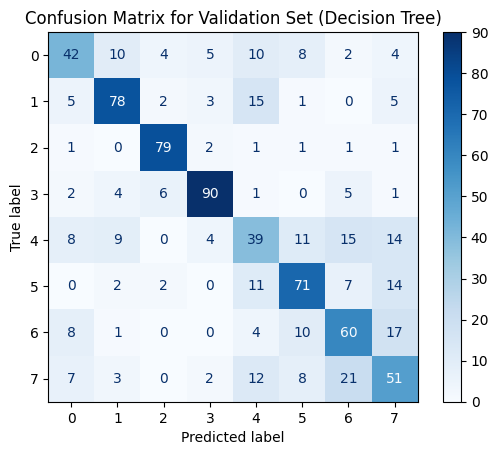

Test Set Evaluation for Decision Tree:
[[74  4  6  4  7  4  6  4]
 [ 8 64  1  2 14  1  0  1]
 [ 1  0 92  1  1  1  1  1]
 [ 7  5  4 77  1  1  1  1]
 [ 2  9  1  3 52 15  6 16]
 [ 0  0  0  0  4 58  7  8]
 [ 1  2  5  1 15 10 64 19]
 [ 4  6  0  2 18  8 15 54]]
                  precision    recall  f1-score   support

     Anthracnose       0.76      0.68      0.72       109
Bacterial Canker       0.71      0.70      0.71        91
  Cutting Weevil       0.84      0.94      0.89        98
        Die Back       0.86      0.79      0.82        97
      Gall Midge       0.46      0.50      0.48       104
         Healthy       0.59      0.75      0.66        77
  Powdery Mildew       0.64      0.55      0.59       117
     Sooty Mould       0.52      0.50      0.51       107

        accuracy                           0.67       800
       macro avg       0.67      0.68      0.67       800
    weighted avg       0.67      0.67      0.67       800



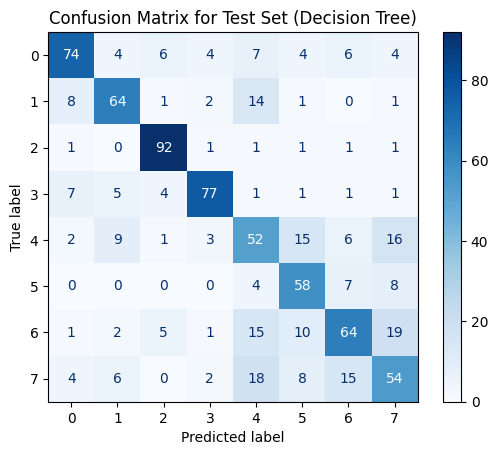

Validation Set Evaluation for Random Forest:
[[ 74   2   0   0   3   1   3   2]
 [  3  94   0   4   3   0   0   5]
 [  1   0  85   0   0   0   0   0]
 [  1   2   1 102   1   0   1   1]
 [  4   5   0   2  81   6   2   0]
 [  2   0   0   0   4  98   0   3]
 [  0   1   0   1   4   0  85   9]
 [  1   0   0   0  10   7   3  83]]
                  precision    recall  f1-score   support

     Anthracnose       0.86      0.87      0.87        85
Bacterial Canker       0.90      0.86      0.88       109
  Cutting Weevil       0.99      0.99      0.99        86
        Die Back       0.94      0.94      0.94       109
      Gall Midge       0.76      0.81      0.79       100
         Healthy       0.88      0.92      0.89       107
  Powdery Mildew       0.90      0.85      0.88       100
     Sooty Mould       0.81      0.80      0.80       104

        accuracy                           0.88       800
       macro avg       0.88      0.88      0.88       800
    weighted avg       0.88      0

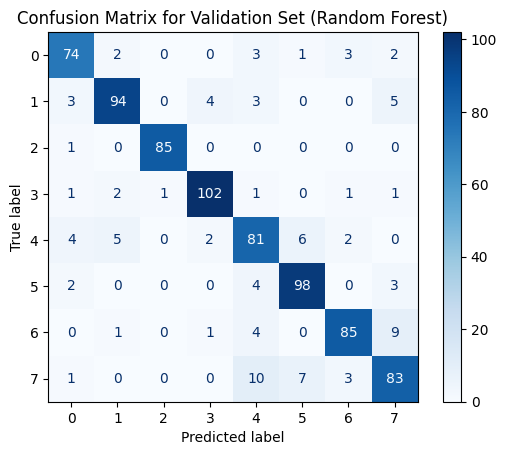

Test Set Evaluation for Random Forest:
[[ 95   0   1   4   4   1   2   2]
 [  3  77   0   1  10   0   0   0]
 [  1   0  97   0   0   0   0   0]
 [  5   2   4  86   0   0   0   0]
 [  1   2   0   2  92   3   2   2]
 [  2   1   0   0   5  67   0   2]
 [  1   0   1   1   5   1 100   8]
 [  3   1   0   0  12   7   4  80]]
                  precision    recall  f1-score   support

     Anthracnose       0.86      0.87      0.86       109
Bacterial Canker       0.93      0.85      0.89        91
  Cutting Weevil       0.94      0.99      0.97        98
        Die Back       0.91      0.89      0.90        97
      Gall Midge       0.72      0.88      0.79       104
         Healthy       0.85      0.87      0.86        77
  Powdery Mildew       0.93      0.85      0.89       117
     Sooty Mould       0.85      0.75      0.80       107

        accuracy                           0.87       800
       macro avg       0.87      0.87      0.87       800
    weighted avg       0.87      0.87   

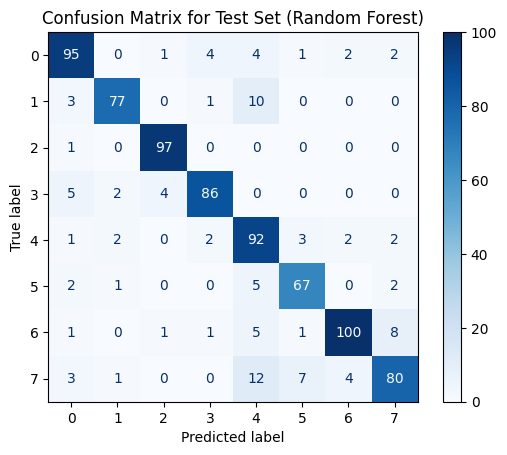

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Convert to features and labels
X = all_images.reshape(all_images.shape[0], -1)  # Reshape to (number_of_images, 128*128*3)
y = labels

# Confirm dimensions after flattening
print("Shape after flattening:", X.shape)


if len(X) != len(y):
    print("Error: The number of images and labels do not match!")
else:
    # Split the dataset into training (60%), validation (20%), and test sets (20%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 40% for temp
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp into 50% validation and 50% test


    print("Training set shape:", X_train.shape)
    print("Validation set shape:", X_val.shape)
    print("Test set shape:", X_test.shape)

    # Train Decision Tree
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)

    # Predictions for validation and test sets
    y_val_pred = dt_model.predict(X_val)
    y_test_pred = dt_model.predict(X_test)

    # Confusion Matrix and Classification Report for Decision Tree
    print("Validation Set Evaluation for Decision Tree:")
    cm_val_dt = confusion_matrix(y_val, y_val_pred)
    print(cm_val_dt)
    print(classification_report(y_val, y_val_pred))

    disp_val_dt = ConfusionMatrixDisplay(confusion_matrix=cm_val_dt)
    disp_val_dt.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix for Validation Set (Decision Tree)")
    plt.show()

    print("Test Set Evaluation for Decision Tree:")
    cm_test_dt = confusion_matrix(y_test, y_test_pred)
    print(cm_test_dt)
    print(classification_report(y_test, y_test_pred))

    disp_test_dt = ConfusionMatrixDisplay(confusion_matrix=cm_test_dt)
    disp_test_dt.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix for Test Set (Decision Tree)")
    plt.show()

    # Train Random Forest
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    # Predictions for validation and test sets
    y_val_pred_rf = rf_model.predict(X_val)
    y_test_pred_rf = rf_model.predict(X_test)

    # Confusion Matrix and Classification Report for Random Forest
    print("Validation Set Evaluation for Random Forest:")
    cm_val_rf = confusion_matrix(y_val, y_val_pred_rf)
    print(cm_val_rf)
    print(classification_report(y_val, y_val_pred_rf))

    disp_val_rf = ConfusionMatrixDisplay(confusion_matrix=cm_val_rf)
    disp_val_rf.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix for Validation Set (Random Forest)")
    plt.show()

    print("Test Set Evaluation for Random Forest:")
    cm_test_rf = confusion_matrix(y_test, y_test_pred_rf)
    print(cm_test_rf)
    print(classification_report(y_test, y_test_pred_rf))

    disp_test_rf = ConfusionMatrixDisplay(confusion_matrix=cm_test_rf)
    disp_test_rf.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix for Test Set (Random Forest)")
    plt.show()


**Shape after flattening:**  (4000, 49152) indicates 4000 samples flattened into 49152 features each.

**Data Splits:**
Training Set: 2400 samples
Validation Set: 800 samples
Test Set: 800 samples

**Decision Tree Evaluation**
Validation Set:

**Confusion Matrix:** Shows predictions vs. actual classes.
Accuracy: 64% (indicating the model correctly classified 64% of the samples).
Test Set:
Accuracy: 67%.

**Random Forest Evaluation:**
Validation Set:
Confusion Matrix: Indicates better performance than the Decision Tree.
Accuracy: 88%.
Test Set:
Accuracy: 87%.
**Comparison:**
**Random Forest outperformed Decision Tree: **
Higher accuracy (88% vs. 64% on validation).
Better precision and recall for most classes.

**Conclusion:**
The Random Forest model is more effective, demonstrating better overall classification performance compared to the Decision Tree model.